#### fare attenzione alle parti commentate di questo codice!!!


In [119]:
from readability import Readability
import spacy
import nltk
import en_core_web_sm
nlp = en_core_web_sm.load()
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import re
import nltk
import csv
from collections import Counter
from readability import exceptions

path= r"/Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI"


matrix=[]


output_file='text_analysis_readability.csv'
header=['Title','House', 'Decade', 'Year', 'Category', 'Flesch_Kincaid_score', 'Flesch_Kincaid_gl', 'flesch_score', 'flesch_reading_ease', 'flesch_gl', 'dale_chall_score', 'dale_chall_gl','ari_score', 'ari_gl', 'ari_ages', 'coleman_liau_score', 'coleman_liau_gl', 'smog_score', 'smog_gl', 'spache_score', 'spache_gl','linsear_write_score', 'linsear_write_gl']


with open (output_file, 'w', encoding='utf-8', newline='\n') as output_handle:
    my_writer= csv.writer(output_handle, delimiter=';', quotechar='"')
    my_writer.writerow(header)

    for dirpath, dirnames, files in os.walk(path):
        print(f'Found directory: {dirpath}')
        for file in files:
            if file[0] == '.':
                continue
            with open(dirpath+ "/" + file, 'r', encoding='Latin-1') as f:
                try:
                    text=f.read()
                    r = Readability(text)

                    fk = r.flesch_kincaid()
                    Flesch_Kincaid_score = fk.score
                    Flesch_Kincaid_gl = fk.grade_level

                    f = r.flesch()
                    flesch_score =(f.score)
                    flesch_reading_ease=(f.ease)
                    for i in f.grade_levels:   
                        flesch_gl = str(i[0])

                    dc = r.dale_chall()
                    dale_chall_score =(dc.score)
                    for k in dc.grade_levels:
                        dale_chall_gl =str(k)

                    ari = r.ari()
                    ari_score =ari.score
                    for y in ari.grade_levels:
                        ari_gl =str(y)
                    for t in ari.ages:
                        ari_ages=str(t)

                    cl = r.coleman_liau()
                    coleman_liau_score = (cl.score)
                    coleman_liau_gl = (cl.grade_level)

                    s = r.smog(all_sentences=True)
                    smog_score =(s.score)
                    smog_gl = (s.grade_level)

                    s = r.spache()
                    spache_score = (s.score)
                    spache_gl =s.grade_level

                    lw = r.linsear_write()
                    linsear_write_score = (lw.score)
                    linsear_write_gl = (lw.grade_level)

                    print('file ok: {}'.format(dirpath + "/" + file))
                    for i in flesch_gl:
                        flesch_gl = str(i)


                    x=dirpath.split('/')
                    print(x)
                    decade=x[-1]

                    if x[8]== 'DISNEY':
                        house=x[8]
                        category=x[9]
                    else:
                        house=x[8]
                        category='Animation'


                

                    s=file.split('.')
                    title=s[0]
                    year=s[1]

                    row=[title, house, decade, year, category, Flesch_Kincaid_score, Flesch_Kincaid_gl, flesch_score, flesch_reading_ease, flesch_gl, dale_chall_score, dale_chall_gl,
                                           ari_score, ari_gl, ari_ages, coleman_liau_score, coleman_liau_gl, smog_score, smog_gl, spache_score, spache_gl,
                                          linsear_write_score, linsear_write_gl]
                                            
                                    
                    list_indices = [title, year, decade, house, category, Flesch_Kincaid_score, Flesch_Kincaid_gl, flesch_score, flesch_reading_ease, flesch_gl, dale_chall_score, dale_chall_gl,
                                           ari_score, ari_gl, ari_ages, coleman_liau_score, coleman_liau_gl, smog_score, smog_gl, spache_score, spache_gl,
                                          linsear_write_score, linsear_write_gl]

                    matrix.append(list_indices)

                    my_writer.writerow(row)
                    
                except (exceptions.ReadabilityException):
                    print('\n\n\n!!!!!!File con problemi!!!!! {} \n\n\n'.format(title))
                    pass
                    




Found directory: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI
Found directory: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/BLUE
Found directory: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/BLUE/2000
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/BLUE/2000/Ice Age Dawn of the Dinosaurs.2009.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'BLUE', '2000']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/BLUE/2000/Horton Hears a Who.2008.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'BLUE', '2000']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/BLUE/2000/Ice Age 2-The Meltdown.2006.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANA

file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Universal/1990/The Land Before Time IV-Journey Through the Mists.1996.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Universal', '1990']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Universal/1990/The Land Before Time V-The Mysterious Island.1997.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Universal', '1990']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Universal/1990/The Land Before Time VI-The Secret of Saurus Rock.1998.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Universal', '1990']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Universal/1990/The Land Before Time II-The Great Valley Adventu

file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Dreamworks/2010/Puss in Boots 3D.2011.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Dreamworks', '2010']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Dreamworks/2010/Rise of the Guardians.2012.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Dreamworks', '2010']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Dreamworks/2010/The Croods.2013.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Dreamworks', '2010']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Dreamworks/2010/Penguins Of Madagascar.2014.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', '

file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/StudioGhibli/1990/Pom Poko.1994.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'StudioGhibli', '1990']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/StudioGhibli/1990/Princess Mononoke.1997.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'StudioGhibli', '1990']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/StudioGhibli/1990/The Ocean Waves.1993.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'StudioGhibli', '1990']
Found directory: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Paramount
Found directory: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Paramount/2010
file ok: /Users/val

file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/DISNEY/Animation/2000/Monsters Inc.2001.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'DISNEY', 'Animation', '2000']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/DISNEY/Animation/2000/Meet the Robinsons.2007.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'DISNEY', 'Animation', '2000']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/DISNEY/Animation/2000/The Emperors New Groove.2000.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'DISNEY', 'Animation', '2000']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/DISNEY/Animation/2000/Finding Nemo.2003.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PR

file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/DISNEY/Animation/2010/Toy Story 3.2010.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'DISNEY', 'Animation', '2010']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/DISNEY/Animation/2010/Monsters University.2013.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'DISNEY', 'Animation', '2010']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/DISNEY/Animation/2010/Incredibles 2.2018.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'DISNEY', 'Animation', '2010']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/DISNEY/Animation/2010/Frozen.2013.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANAL

file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/DISNEY/Animation/1990/The Rescuers Down Under.1990.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'DISNEY', 'Animation', '1990']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/DISNEY/Animation/1990/The Hunchback of Notre Dame.1996.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'DISNEY', 'Animation', '1990']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/DISNEY/Animation/1990/A Bug's Life.1998.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'DISNEY', 'Animation', '1990']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/DISNEY/Animation/1990/Toy Story.1995.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER

file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/DISNEY/Live Action/1960/The Gnome-Mobile.1967.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'DISNEY', 'Live Action', '1960']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/DISNEY/Live Action/1960/The Moon-Spinners.1964.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'DISNEY', 'Live Action', '1960']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/DISNEY/Live Action/1960/The Love Bug.1968.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'DISNEY', 'Live Action', '1960']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/DISNEY/Live Action/1960/Pollyanna.1960.txt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 

file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/DISNEY/Live Action/1960/In Search of the Castaways.1962.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'DISNEY', 'Live Action', '1960']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/DISNEY/Live Action/1960/Multiply That Darn Cat.1965.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'DISNEY', 'Live Action', '1960']
Found directory: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/DISNEY/Live Action/1950
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/DISNEY/Live Action/1950/The Shaggy Dog.1959.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'DISNEY', 'Live Action', '1950']
file ok: /Users/valeriaguttilla/Desktop/MASTER/P

file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/DISNEY/Live Action/2000/The Shaggy Dog.2006.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'DISNEY', 'Live Action', '2000']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/DISNEY/Live Action/2000/The Chronicles Of Narnia-The Lion The Witch And The Wardrobe.2005.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'DISNEY', 'Live Action', '2000']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/DISNEY/Live Action/2000/The Princess Diaries 2 Royal Engagement.2004.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'DISNEY', 'Live Action', '2000']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/DISNEY/Live Action/2000/Eight

file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/DISNEY/Live Action/2010/The Finest Hours.2016.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'DISNEY', 'Live Action', '2010']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/DISNEY/Live Action/2010/Timmy Failure Mistakes Were Made.2020.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'DISNEY', 'Live Action', '2010']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/DISNEY/Live Action/2010/A Wrinkle in Time.2018.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'DISNEY', 'Live Action', '2010']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/DISNEY/Live Action/2010/Christopher Robin.2018.srt
['', 'Users', 'valeriagutt

file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/DISNEY/Live Action/1970/Napoleon and Samantha.1972.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'DISNEY', 'Live Action', '1970']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/DISNEY/Live Action/1970/The Cat From Outer Space.1978.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'DISNEY', 'Live Action', '1970']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/DISNEY/Live Action/1970/Shaggy DA.1976.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'DISNEY', 'Live Action', '1970']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/DISNEY/Live Action/1970/No Deposit No Return.1976.srt
['', 'Users', 'valeriaguttilla', '

file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/DISNEY/Live Action/1990/Air Bud.1997.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'DISNEY', 'Live Action', '1990']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/DISNEY/Live Action/1990/The Big Green.1995.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'DISNEY', 'Live Action', '1990']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/DISNEY/Live Action/1990/Heavyweights.1995.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'DISNEY', 'Live Action', '1990']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/DISNEY/Live Action/1990/The Muppet Christmas Carol.1992.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTE

file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/DISNEY/Live Action/1990/Cool Runnings.1993.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'DISNEY', 'Live Action', '1990']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/DISNEY/Live Action/1990/White Fang.1991.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'DISNEY', 'Live Action', '1990']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/DISNEY/Live Action/1990/Iron Will.1994.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'DISNEY', 'Live Action', '1990']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/DISNEY/Live Action/1990/D3 The Mighty Ducks.1996.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PR

file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Aardman/2010/The Pirates In An Adventure With Scientists.2012.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Aardman', '2010']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Aardman/2010/Shaun the Sheep Movie.2015.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Aardman', '2010']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Aardman/2010/A Shaun the Sheep Movie Farmageddon.2019.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Aardman', '2010']
Found directory: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Sony
Found directory: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Sony/2000


In [120]:
df = pd.DataFrame(np.array(matrix),
                   columns=['Movie', 'Year','Decade','House','Category','Flesch_Kincaid_score', 'Flesch_Kincaid_gl', 'flesch_score', 'flesch_reading_ease', 'flesch_gl', 'dale_chall_score', 'dale_chall_gl',
                       'ari_score', 'ari_gl', 'ari_ages', 'coleman_liau_score', 'coleman_liau_gl', 'smog_score', 'smog_gl', 'spache_score', 'spache_gl',
                                     'linsear_write_score', 'linsear_write_gl'])
df

,Movie,Year,Decade,House,Category,Flesch_Kincaid_score,Flesch_Kincaid_gl,flesch_score,flesch_reading_ease,flesch_gl,...,ari_gl,ari_ages,coleman_liau_score,coleman_liau_gl,smog_score,smog_gl,spache_score,spache_gl,linsear_write_score,linsear_write_gl
0,Ice Age Dawn of the Dinosaurs,2009,2000,BLUE,Animation,1.0682431042014535,1,95.51394603049476,very_easy,5,...,K,6,0.908940201302542,1,5.710097335758217,6,4.204898855892834,4,1.576310861423221,2
1,Horton Hears a Who,2008,2000,BLUE,Animation,1.6038131390908248,2,92.46157626337987,very_easy,5,...,K,6,1.2436136747692679,1,6.3299602192906015,6,4.500684453926887,5,1.9164411366711773,2
2,Ice Age 2-The Meltdown,2006,2000,BLUE,Animation,1.1331306717734897,1,95.52277798952919,very_easy,5,...,K,6,1.1858444619010164,1,5.753517016130671,6,3.990931913153014,4,1.7218934911242605,2
3,Ice Age,2002,2000,BLUE,Animation,0.857777548033166,1,97.41357988650391,very_easy,5,...,K,6,0.7013647698934484,1,5.547798236907115,6,4.080606565987409,4,1.665727170236753,2
4,Epic,2013,2010,BLUE,Animation,1.0792746771336397,1,96.9378101391431,very_easy,5,...,K,6,1.332483168316827,1,5.851938301976127,6,3.984298367475945,4,2.038975501113586,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,Goosebumps Haunted Halloween,2018,2010,Sony,Animation,1.2887396626617083,1,94.11088828575605,very_easy,5,...,K,6,0.5017016286644953,1,5.931737742079615,6,4.350818307711618,4,1.6648768161718257,2
429,Hotel Transylvania 3 Summer Vacation,2018,2010,Sony,Animation,1.7075463333441832,2,91.61577256846046,very_easy,5,...,K,6,1.4962549537648613,1,6.4801755257483125,6,4.146189226803024,4,1.9167374681393374,2
430,The Smurfs 2,2013,2010,Sony,Animation,0.6455523032586221,1,99.19069436539557,very_easy,5,...,K,6,-0.1421248339973431,0,5.82211442006289,6,3.7959709280790666,4,1.7834467120181405,2
431,Hotel Transylvania,2012,2010,Sony,Animation,1.2142194151190289,1,94.95983903336234,very_easy,5,...,K,6,0.8781297942286628,1,5.9643926047256155,6,4.0292073163689555,4,1.762561274509804,2


In [121]:
# ricodifico gli indici stringhe in numerici

# c stava per college e saltando il numero 9 ho convertito il 9 in 8 e il college in 9
df['flesch_gl'].replace(to_replace=['c', '9'], value=[9,8], inplace=True )

df['flesch_reading_ease'].replace(to_replace=['very_easy', 'easy', 'fairly_easy', 'very_confusing', 'standard'], 
                                       value=[0,1,2,4,3], inplace=True)

# K stava per kindergarden
df['ari_gl'].replace(to_replace='K', value=0, inplace=True)

df['dale_chall_gl'].replace(to_replace=['college', 'college_graduate'], value=[13,14], inplace=True)

In [122]:
for columns in df.columns:
    if columns not in ['Movie', 'House', 'Category']:
        print (columns)
        df[columns] = pd.to_numeric(df[columns])

Year
Decade
Flesch_Kincaid_score
Flesch_Kincaid_gl
flesch_score
flesch_reading_ease
flesch_gl
dale_chall_score
dale_chall_gl
ari_score
ari_gl
ari_ages
coleman_liau_score
coleman_liau_gl
smog_score
smog_gl
spache_score
spache_gl
linsear_write_score
linsear_write_gl


In [124]:
# seleziono una casa di produzione 

df_selected = df[df['House']=='DISNEY']
# nel caso Disney con più categorie
df_selected = df_selected[df_selected['Category']=='Animation']
df_selected

,Movie,Year,Decade,House,Category,Flesch_Kincaid_score,Flesch_Kincaid_gl,flesch_score,flesch_reading_ease,flesch_gl,...,ari_gl,ari_ages,coleman_liau_score,coleman_liau_gl,smog_score,smog_gl,spache_score,spache_gl,linsear_write_score,linsear_write_gl
96,The Fox And The Hound,1981,1980,DISNEY,Animation,0.955992,1,99.422716,0,5,...,0,6,-1.728811,-2,5.677221,6,4.672409,5,2.479058,2
97,The Little Mermaid,1989,1980,DISNEY,Animation,2.022018,2,94.929934,0,5,...,0,6,0.254699,0,6.505959,7,5.763287,6,3.550911,4
98,Oliver and Company,1988,1980,DISNEY,Animation,1.238150,1,94.730014,0,5,...,0,6,1.029875,1,5.967104,6,4.307961,4,1.745994,2
99,The Great Mouse Detective,1986,1980,DISNEY,Animation,2.352495,2,87.738943,1,6,...,0,6,2.701353,3,6.852066,7,4.477071,4,2.215882,2
100,The Black Cauldrion,1985,1980,DISNEY,Animation,0.852796,1,96.845689,0,5,...,0,6,0.574192,1,5.425710,5,3.804927,4,1.471534,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,A Bug's Life,1998,1990,DISNEY,Animation,1.047910,1,96.039356,0,5,...,0,6,0.883950,1,5.857780,6,4.044828,4,1.711380,2
181,Toy Story,1995,1990,DISNEY,Animation,1.150107,1,94.989516,0,5,...,0,6,0.933596,1,5.877374,6,4.301490,4,1.621906,2
182,Toy Story 2,1999,1990,DISNEY,Animation,1.206766,1,94.615686,0,5,...,0,6,0.895903,1,5.918413,6,4.252195,4,1.638341,2
183,Hercules,1997,1990,DISNEY,Animation,1.383581,1,96.071671,0,5,...,0,6,0.888369,1,6.210000,6,5.002607,5,2.487458,2


In [125]:
# separo le colonne di grade_levels dagli score

grade_levels_df=df_selected[['Movie','Year','Decade','House','Category','Flesch_Kincaid_gl', 'flesch_gl', 'dale_chall_gl', 'spache_gl','ari_gl', 'coleman_liau_gl',  'smog_gl', 'linsear_write_gl']]
scores_df=df_selected[['Movie','Year','Decade', 'House','Category','Flesch_Kincaid_score', 'flesch_score', 'dale_chall_score', 'spache_score', 'ari_score', 'coleman_liau_score', 'smog_score', 'linsear_write_score']]


Analisi sugli score

In [126]:
min_max_scaler = MinMaxScaler()
scores_df[['Flesch_Kincaid_score', 'flesch_score', 'dale_chall_score', 'spache_score', 'ari_score', 'coleman_liau_score', 'smog_score', 'linsear_write_score']] = min_max_scaler.fit_transform(scores_df[['Flesch_Kincaid_score', 'flesch_score', 'dale_chall_score', 'spache_score', 'ari_score', 'coleman_liau_score', 'smog_score', 'linsear_write_score']])
scores_df

/Users/valeriaguttilla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/valeriaguttilla/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Movie,Year,Decade,House,Category,Flesch_Kincaid_score,flesch_score,dale_chall_score,spache_score,ari_score,coleman_liau_score,smog_score,linsear_write_score
96,The Fox And The Hound,1981,1980,DISNEY,Animation,0.120152,0.961468,0.292911,0.162398,0.000000,0.000000,0.144380,0.184585
97,The Little Mermaid,1989,1980,DISNEY,Animation,0.293309,0.828878,0.309003,0.366617,0.187087,0.235437,0.332981,0.342101
98,Oliver and Company,1988,1980,DISNEY,Animation,0.165983,0.822978,0.097921,0.094171,0.278643,0.327448,0.210351,0.076856
99,The Great Mouse Detective,1986,1980,DISNEY,Animation,0.346989,0.616658,0.134683,0.125829,0.402232,0.525848,0.411746,0.145909
100,The Black Cauldrion,1985,1980,DISNEY,Animation,0.103389,0.885415,0.027446,0.000000,0.260606,0.273360,0.087143,0.036522
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,A Bug's Life,1998,1990,DISNEY,Animation,0.135082,0.861619,0.044523,0.044911,0.267494,0.310128,0.185471,0.071769
181,Toy Story,1995,1990,DISNEY,Animation,0.151682,0.830636,0.086388,0.092960,0.281900,0.316020,0.189930,0.058620
182,Toy Story 2,1999,1990,DISNEY,Animation,0.160885,0.819604,0.068462,0.083731,0.277511,0.311546,0.199270,0.061036
183,Hercules,1997,1990,DISNEY,Animation,0.189606,0.862573,0.186588,0.224213,0.229535,0.310652,0.265628,0.185819


In [127]:
# NON USARE VERSIONE INIZIALE

scaler = MinMaxScaler()
scaled_scores = scaler.fit_transform(scores_df.iloc[:, 2:].values)
scaled_scores_df=pd.DataFrame(scaled_scores)
# unisco l'anno e il titolo
scaled_scores_df=scaled_scores_df.join(scores_df['Movie']).join(scores_df['Year'])
# riordino mettendo anno e titolo davanti
scaled_scores_df = scaled_scores_df.reindex(columns=['Movie','Year',0,1,2,3,4,5,6,7])
# rinomino le colonne con i nomi degli scores
scaled_scores_df= scaled_scores_df.rename(columns={0: "Flesch_Kincaid_score", 1: "flesch_score", 2: 'dale_chall_score',  3:'spache_score', 4: 'ari_score', 5: 'coleman_liau_score', 6: 'smog_score', 7: 'linsear_write_score'})

ValueError: could not convert string to float: 'DISNEY'

In [129]:
# raggruppo per anno oppure per decade, a seconda di quello che voglio vedere

mean_score = scores_df.groupby('Decade').mean()
#mean_score = scores_df.groupby('Year').mean()

mean_score

,Year,Flesch_Kincaid_score,flesch_score,dale_chall_score,spache_score,ari_score,coleman_liau_score,smog_score,linsear_write_score
Decade,,,,,,,,,
1930,1937.000000,0.094025,0.943604,0.023141,0.050271,0.285852,0.365501,0.060688,0.101166
1940,1943.600000,0.255246,0.752209,0.098787,0.112942,0.331962,0.410000,0.307260,0.159068
1950,1953.600000,0.221493,0.789141,0.083587,0.093516,0.318713,0.411827,0.248147,0.138088
1960,1963.666667,0.201341,0.807553,0.068717,0.081584,0.334417,0.428681,0.249366,0.126293
1970,1974.250000,0.265993,0.731347,0.092097,0.109728,0.383707,0.499071,0.296733,0.143725
1980,1985.800000,0.205964,0.823079,0.172393,0.149803,0.225713,0.272419,0.237320,0.157195
1990,1994.800000,0.269963,0.761485,0.184784,0.212338,0.304260,0.385186,0.309766,0.198929
2000,2004.153846,0.232181,0.789362,0.089271,0.091337,0.333610,0.405877,0.267654,0.163009
2010,2014.160000,0.226910,0.792159,0.107170,0.105168,0.319680,0.389657,0.277123,0.157433


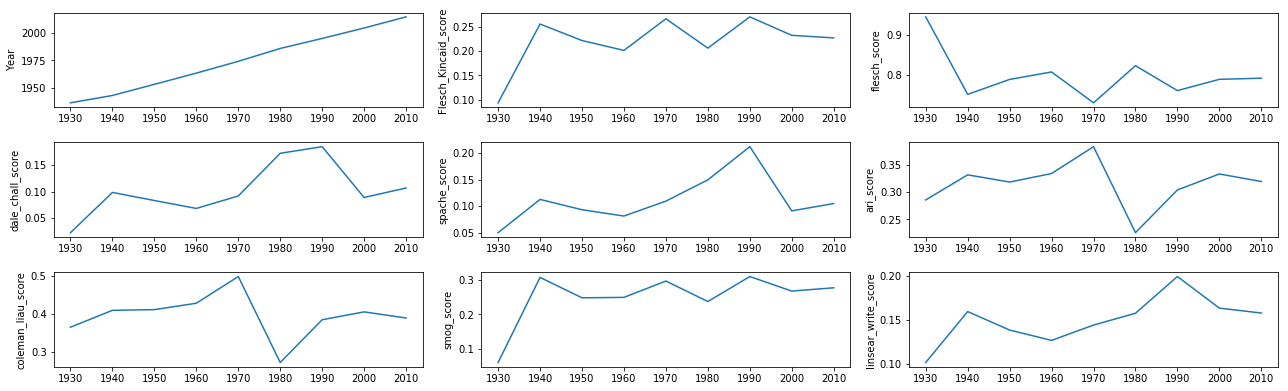

In [132]:
# plot degli score 

plt.figure(figsize=(18, 18)) 
# selezionare le dimensioni a seconda di quanti grafici si hanno
fig_dims = (10, 3)
i = 0
j = 0
for c in mean_score:
    plt.subplot2grid(fig_dims, (i, j))
    plt.plot(mean_score[(str(c))])
    plt.ylabel(str(c))

        # j deve essere il numero delle dimensioni fig_dims(x,y) di y-1 
    if (j < 2):
        j += 1
    else:
        j = 0
        i += 1
        

plt.tight_layout()
plt.show()
plt.rcParams['font.size'] = 10



Analisi grade levels

In [133]:
# raggruppo per anno o per decade (come fatto per gli scores)

#grade_levels_df= grade_levels_df.groupby('Year').mean()
grade_levels_df= grade_levels_df.groupby('Decade').mean()
grade_levels_df

,Year,Flesch_Kincaid_gl,flesch_gl,dale_chall_gl,spache_gl,ari_gl,coleman_liau_gl,smog_gl,linsear_write_gl
Decade,,,,,,,,,
1930,1937.000000,1.000000,5.000000,8.000000,4.000000,0.000000,1.000000,5.000000,2.000000
1940,1943.600000,1.600000,5.200000,10.200000,4.400000,0.600000,1.600000,6.200000,2.400000
1950,1953.600000,1.600000,5.200000,9.200000,4.200000,0.000000,1.800000,6.000000,2.200000
1960,1963.666667,1.333333,5.000000,9.333333,4.000000,0.000000,2.000000,6.000000,2.000000
1970,1974.250000,1.750000,5.250000,10.000000,4.250000,0.000000,2.500000,6.250000,2.250000
1980,1985.800000,1.400000,5.200000,10.800000,4.600000,0.000000,0.600000,6.200000,2.200000
1990,1994.800000,1.666667,5.266667,10.466667,4.933333,0.200000,1.600000,6.400000,2.666667
2000,2004.153846,1.692308,5.384615,9.846154,4.269231,0.307692,1.692308,6.269231,2.384615
2010,2014.160000,1.560000,5.360000,10.200000,4.320000,0.280000,1.440000,6.240000,2.280000


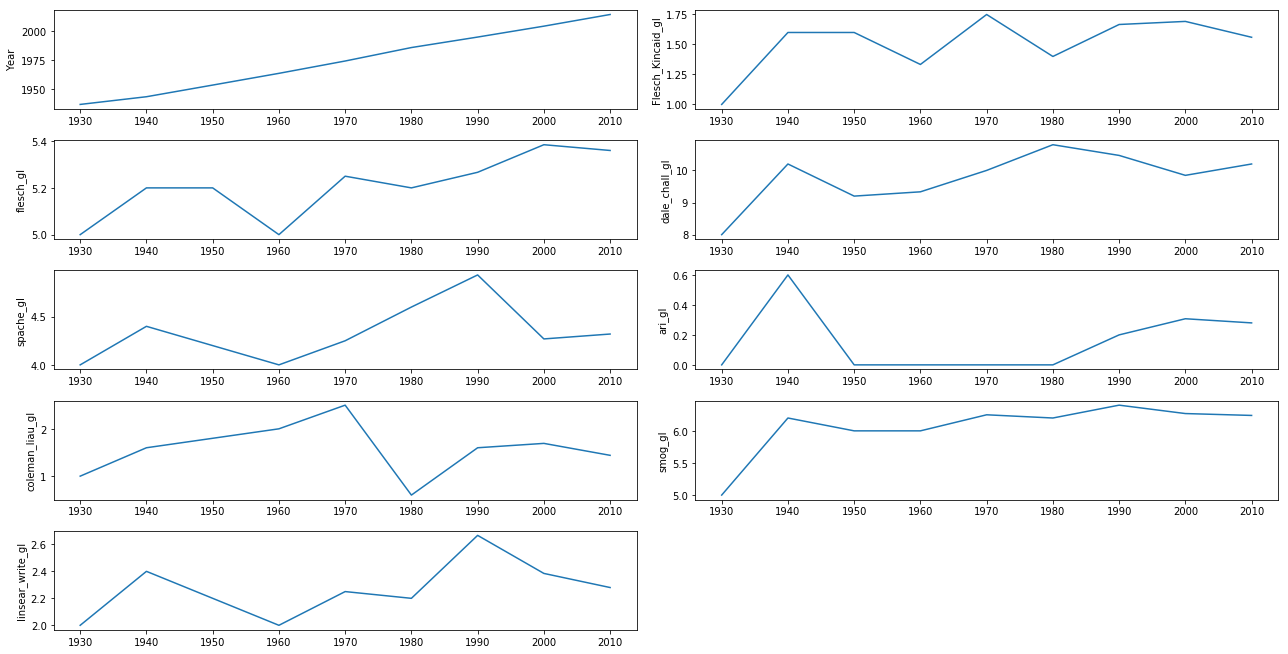

In [134]:
# plots for grade levels. Note: not normalized (non ha senso normalizzarli!)

plt.figure(figsize=(18, 18)) 
fig_dims = (10, 2)
i = 0
j = 0
for c in grade_levels_df.columns:
    plt.subplot2grid(fig_dims, (i, j))
    plt.plot(grade_levels_df[(str(c))])
    plt.ylabel(str(c))

    if (j < 1):
        j += 1
    else:
        j = 0
        i += 1
        

plt.tight_layout()
plt.show()
plt.rcParams['font.size'] = 10